In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
# build the dataset
# 用前三个预测下一个字符
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [9]:
C = torch.randn((27, 2)) # 这个2 是定义的二维
C

tensor([[-1.0331,  0.4830],
        [-1.7316, -0.1868],
        [-0.5088, -0.4916],
        [-0.0485,  0.6803],
        [ 0.1504,  0.4774],
        [-0.3725,  0.1917],
        [-0.0763,  0.1878],
        [ 0.8829,  2.5595],
        [ 0.8439,  0.6608],
        [-2.3394, -0.6645],
        [-0.0158, -1.2085],
        [ 0.0229, -0.4136],
        [ 0.0510,  0.3435],
        [-0.9926, -0.2523],
        [ 0.5463,  0.4735],
        [ 1.5295, -0.2813],
        [ 1.2381,  0.1905],
        [ 0.7046, -2.0495],
        [ 0.7763,  0.5294],
        [ 0.5220,  0.9010],
        [ 1.2530, -1.6880],
        [-1.3393, -1.3015],
        [ 1.6093, -0.2918],
        [-0.9433,  0.6151],
        [ 2.1522, -0.7601],
        [ 0.4330,  0.6636],
        [ 0.0128,  2.0664]])

In [11]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [17]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [23]:
lri = []
lossi = []
for p in parameters:
  p.requires_grad = True
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [25]:

for i in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]]                # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2          # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lr)
    lossi.append(loss.item())

    # print(loss.item())  # optional


18.703189849853516
18.704265594482422
16.798229217529297
16.583017349243164
20.31932830810547
19.07457733154297
18.517986297607422
20.38306427001953
21.09379768371582
20.150066375732422
18.850997924804688
20.943737030029297
19.67634391784668
17.89824104309082
17.210729598999023
18.211336135864258
16.823213577270508
17.984983444213867
19.076766967773438
19.51787567138672
22.238691329956055
18.302650451660156
18.770647048950195
17.455801010131836
18.376428604125977
19.034008026123047
17.017024993896484
15.324909210205078
17.646432876586914
20.740732192993164
17.568302154541016
17.172361373901367
18.56232261657715
19.12957763671875
16.561391830444336
18.808521270751953
15.99319839477539
18.28711700439453
17.074928283691406
17.876333236694336
21.836071014404297
20.157772064208984
17.212610244750977
16.91741180419922
20.74161148071289
16.728178024291992
19.86617088317871
19.056800842285156
17.068212509155273
19.3503475189209
16.8549747467041
17.640459060668945
20.171117782592773
16.15300941

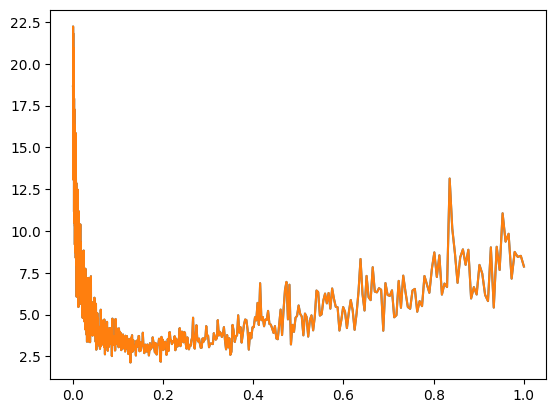

In [29]:
plt.plot(lri, lossi)
plt.show()

In [ ]:

lri = []
lossi = []
stepi = []
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())